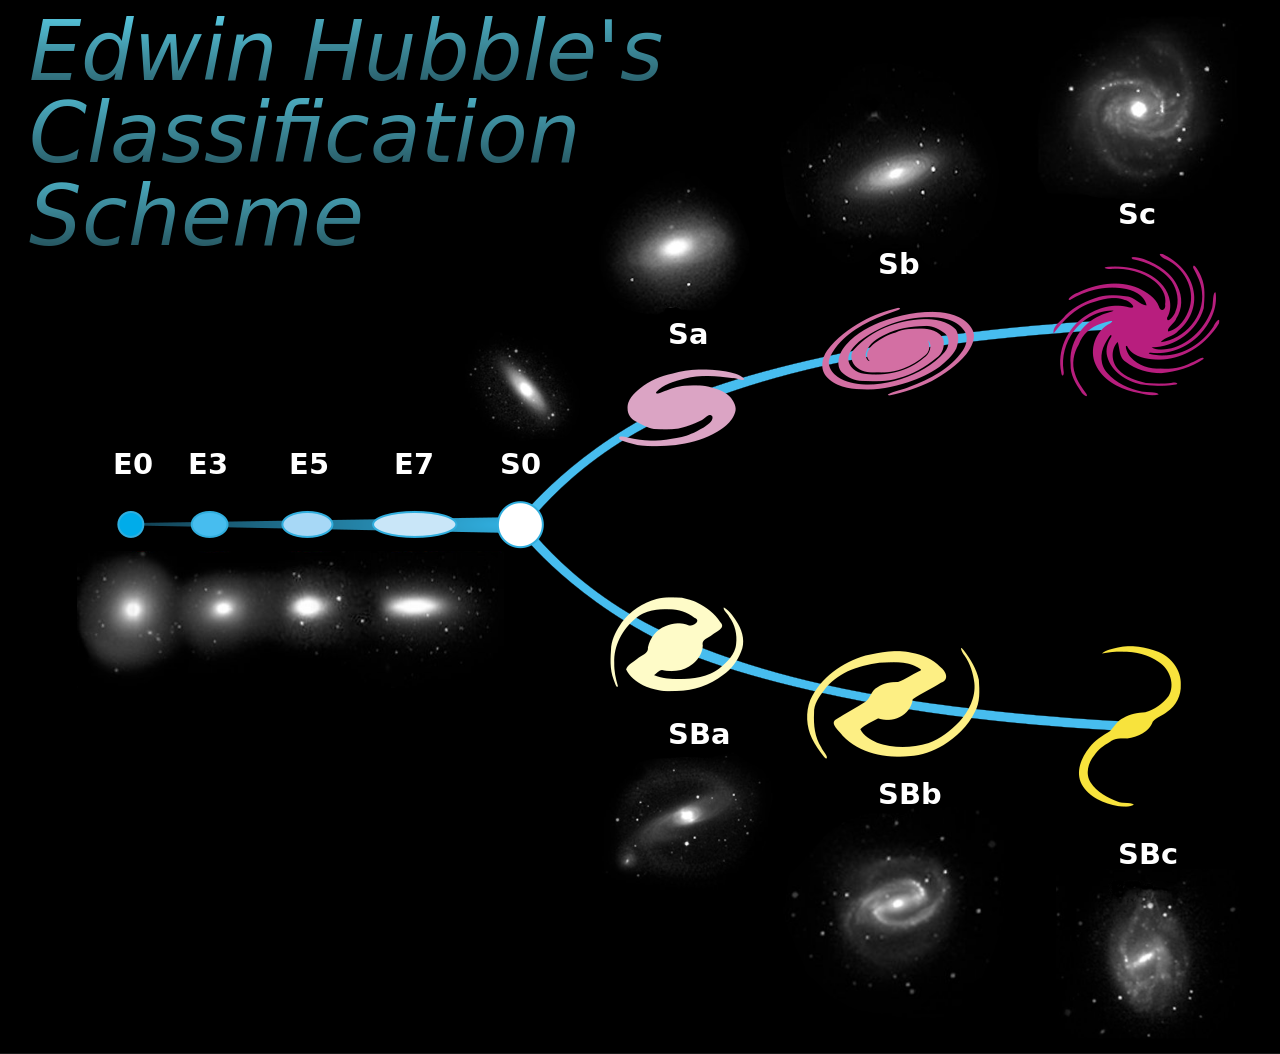

Original gz2 dataframe (https://arxiv.org/pdf/1308.3496v2)
- elements between () means any "odd" features


In [2]:
import sys
sys.path.append('../src')

import pandas as pd
import json
import os
import random

from config import DATASET_DIR, CLASS_MAPPING
from visual import plot_distribution
from utils import get_class_distribution

In [3]:
# gz2_hart16 contains the galaxyzoo2 catalog
df = pd.read_csv(os.path.join(DATASET_DIR, 'original/gz2_hart16.csv')).rename(columns={"dr7objid": "objid"})

In [4]:
columns_to_keep = ["objid",	"ra", "dec", "sample", "gz2_class"]
df = df[columns_to_keep]

In [5]:
len(df["gz2_class"].unique())

818

In [6]:
df

,objid,ra,dec,sample,gz2_class
0,587732591714893851,179.042984,60.522518,original,Sc+t
1,588009368545984617,135.084396,52.494240,original,Sb+t
2,587732484359913515,183.371979,50.741508,original,Ei
3,587741723357282317,186.251953,28.558598,original,Sc+t
4,587738410866966577,161.086395,14.084465,original,Er
...,...,...,...,...,...
239690,587741490371625059,167.542648,28.991867,extra,Ec
239691,587731174917669027,316.108826,1.214799,stripe82,Ei(i)
239692,587731512070177108,21.690212,-0.546427,stripe82,Ei
239693,587731513145688256,25.747143,0.360079,stripe82,Ei(i)


In [7]:
# Reducing the number of classes is necessary
# Deletes anything between (), meaning any "odd" features
df['gz2_class'] = df['gz2_class'].str.replace(r'\(.*?\)', '', regex=True)

# Delete anything that follows a number, a "+" or a "?". This means that the number of arms and the winding are deleted
df['gz2_class'] = df['gz2_class'].str.replace(r'[\d+?].*', '', regex=True)

In [8]:
len(df["gz2_class"].unique())

15

In [9]:
df

,objid,ra,dec,sample,gz2_class
0,587732591714893851,179.042984,60.522518,original,Sc
1,588009368545984617,135.084396,52.494240,original,Sb
2,587732484359913515,183.371979,50.741508,original,Ei
3,587741723357282317,186.251953,28.558598,original,Sc
4,587738410866966577,161.086395,14.084465,original,Er
...,...,...,...,...,...
239690,587741490371625059,167.542648,28.991867,extra,Ec
239691,587731174917669027,316.108826,1.214799,stripe82,Ei
239692,587731512070177108,21.690212,-0.546427,stripe82,Ei
239693,587731513145688256,25.747143,0.360079,stripe82,Ei


In [10]:
sorted(df["gz2_class"].unique())

['A',
 'Ec',
 'Ei',
 'Er',
 'SBa',
 'SBb',
 'SBc',
 'SBd',
 'Sa',
 'Sb',
 'Sc',
 'Sd',
 'Seb',
 'Sen',
 'Ser']

<Axes: xlabel='gz2_class'>

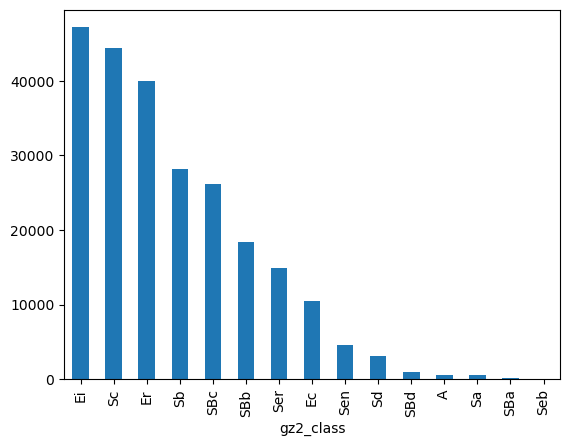

In [11]:
df["gz2_class"].value_counts().plot(kind="bar")

By using the previous 15 categories the dataset is too unbalanced, so the following aggregation is performed.

5 categories
- A: star or artifact 
- E: Elliptical, which contains (c)igar-shaped, (i)n-between, (r)ounded
- S: Spiral, whic groups all bulge prominence (‘Sd’ = none, ‘Sc’ = just noticeable, ‘Sb’ = obvious, ‘Sa’ = dominant). 
- SB: Spiral Barred, which groups all barred with bulge prominence (‘SBd’ = none, ‘SBc’ = just noticeable, ‘SBb’ = obvious, ‘SBa’ = dominant).
- Se: Spiral edge-on disks, which groups all edge-on with bulge shape (‘Sen’ = none, ‘Seb’ = boxy, ‘Ser’ = rounded).

In [12]:
df['gz2_class_group'] = df['gz2_class'].replace(CLASS_MAPPING)

In [13]:
# Code to open original file and concatenate them
# with open(os.path.join(DATASET_DIR,"original/train/via_region_data.json"), 'r') as file:
#     train = json.load(file)

# with open(os.path.join(DATASET_DIR,"original/val/via_region_data.json"), 'r') as file:
#     val = json.load(file)

# combined_data = train | val

# with open(os.path.join(DATASET_DIR,"original/galaxy_segment.json"), 'w') as output_file:
#     json.dump(combined_data, output_file)

In [14]:
# galaxy_segment.json is simply the concatenation of train and validation of the original dataset
with open(os.path.join(DATASET_DIR, 'original/galaxy_segment.json')) as json_data:
    gal_seg = json.load(json_data)

In [15]:
# From the original dataset we keep only the data that have a ground truth mask
objids = [int(el) for el in list(gal_seg.keys())]
filtered_df = df[df['objid'].isin(objids)]

In [16]:
filtered_df

,objid,ra,dec,sample,gz2_class,gz2_class_group
21,587729158986203270,239.945694,2.712762,original,Er,elliptical
35,587736808845475892,223.980301,11.861526,original,Er,elliptical
49,587735664778477588,238.758041,41.578335,original,Ei,elliptical
58,587742551763517566,240.400726,12.360189,original,Ec,elliptical
59,587728930807808089,139.727158,50.020672,original,Er,elliptical
...,...,...,...,...,...,...
239665,587746209446887652,163.136765,8.834344,original,Ec,elliptical
239673,587734621636460661,142.053253,37.672295,extra,Ei,elliptical
239680,587741602566897791,179.659058,27.969189,extra,Ec,elliptical
239683,587739608626888793,183.491501,32.117870,original,Ec,elliptical


In [17]:
# Add class to objects in the filtered galaxyzoo2 catalog
dict_with_classes = {}
for k, v in gal_seg.items():
    # print(k)
    gz2_class = filtered_df[filtered_df["objid"] == int(k)]["gz2_class_group"].values
    if len(gz2_class) == 1:
        gz2_class = gz2_class[0]
        dict_with_classes[k] = v
        dict_with_classes[k]["regions"][0]["region_attributes"]["object_name"] = gz2_class

In [18]:
len(dict_with_classes)

29302

In [19]:
random.choice(list(dict_with_classes.items()))

('587732701780115784',
 {'file_attributes': {},
  'filename': 'Dr7_587732701780115784.jpg',
  'regions': [{'shape_attributes': {'name': 'polygon',
     'all_points_x': [136,
      135,
      134,
      133,
      131,
      130,
      127,
      126,
      125,
      124,
      122,
      121,
      120,
      110,
      109,
      108,
      108,
      104,
      105,
      103,
      103,
      105,
      105,
      106,
      107,
      108,
      109,
      110,
      113,
      114,
      117,
      118,
      120,
      121,
      126,
      127,
      128,
      129,
      130,
      131,
      132,
      133,
      135,
      144,
      144,
      150,
      150,
      148,
      140,
      139,
      138,
      137],
     'all_points_y': [114,
      115,
      115,
      116,
      116,
      117,
      117,
      118,
      118,
      119,
      119,
      120,
      120,
      130,
      130,
      131,
      132,
      136,
      137,
      139,
      140,
      142,
      

In [20]:
with open(os.path.join(DATASET_DIR, 'galaxy_segment_classes.json'), "w") as fp:
    json.dump(dict_with_classes, fp)